## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import random
import matplotlib
import numpy as np 
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.metrics import r2_score

In [2]:
def plotting (x_axis,y_axis,x_label,y_label,title):
    plt.figure(figsize=(10, 10))
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.title(title, fontdict = font1)
    plt.xlabel(x_label, font1)
    plt.ylabel(y_label, font2)
    plt.plot(x_axis,y_axis)
    plt.scatter(x_axis,y_axis,c="r")

    plt.show()

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
X.shape

(50,)

In [5]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

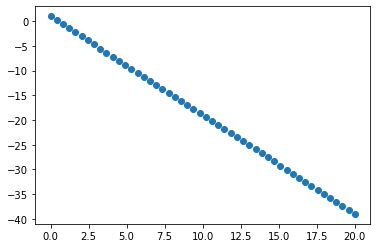

In [6]:
plt.scatter(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [7]:
def GD_fun(X, y,iteration,lr) :
    theta_0 = theta_1 = 0
    m = len(X)
    theta0_lst = []
    theta1_lst = []
    cost_lst = []
    hs = []
    itert=0
    for i in range (iteration):
        # general function of the model of LR
        h_x = theta_0 + X*theta_1
        hs.append(h_x)
        # error = predicted -actual
        error = h_x - y
        # calculate cost function usin mean square error using dot product(make the summition of erroe**2)
        MSA = error @ error / (2 * m)
        cost_lst.append(MSA)
        # THETA_NEW = THETA_OLD - LEARNING_RATE * DERIVATIVE COST_FUN W.R.T OLD THETA 
        d_theta_0 = (sum(error)/m) # dj/d theta_0 = segma(error) /m 
        d_theta_1 = (error@X) /m   #dj/d theta_1 = segma(error)*X /m
        # update the weights
 
        theta_0 = theta_0 - lr*d_theta_0
        theta_1 = theta_1 - lr*d_theta_1
        theta0_lst.append(theta_0)
        theta1_lst.append(theta_1)
        # get norm of gradient to check if it close to zero stop iteration 
        # why norm beacuse here we have 2 componantes theta_0 and theta _1
        gradient_vector = np.array([d_theta_0,d_theta_1])
        gradient_vector_norm = LA.norm(gradient_vector,1)
        if i<20 or i>990:
            print("\n###########iteration==",i,"#######################")
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)
        if (int(gradient_vector_norm) == 0)and (cost_lst[i] -cost_lst[i-1]<=0.01) :
            print ("#############the gradient is close to zero############")
            print("iteration == ", i )
            itert=i
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)

            break
    return (theta_0,theta_1,hs,cost_lst,itert,theta0_lst,theta1_lst)



#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [8]:
theta_0,theta_1,hs,cost_lst,itert,theta0_lst,theta1_lst = GD_fun(X, y,300,0.0005)


###########iteration== 0 #######################
j== 249.88775510204084
gradient_vector [ 19.        259.3877551]
gradient_vector_norm 278.38775510204084

###########iteration== 1 #######################
j== 217.2114267068664
gradient_vector [ 17.69356122 241.82378384]
gradient_vector_norm 259.5173450645565

###########iteration== 2 #######################
j== 188.810851451214
gradient_vector [ 16.47559552 225.44922447]
gradient_vector_norm 241.92481999388224

###########iteration== 3 #######################
j== 164.12653903114239
gradient_vector [ 15.3401116  210.18353137]
gradient_vector_norm 225.52364297883668

###########iteration== 4 #######################
j== 142.67220949672134
gradient_vector [ 14.28152389 195.9516134 ]
gradient_vector_norm 210.23313728905686

###########iteration== 5 #######################
j== 124.02521354011064
gradient_vector [ 13.29462506 182.68346447]
gradient_vector_norm 195.97808953024455

###########iteration== 6 #######################
j== 107.818206

#### Calculate r2 score

In [9]:
print(f'r2_score: {r2_score(y,hs[-1])}')

r2_score: 0.9976015012060915


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

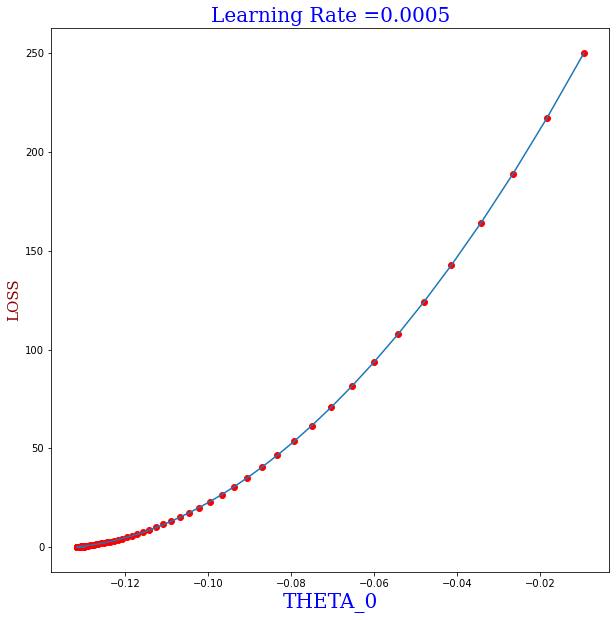

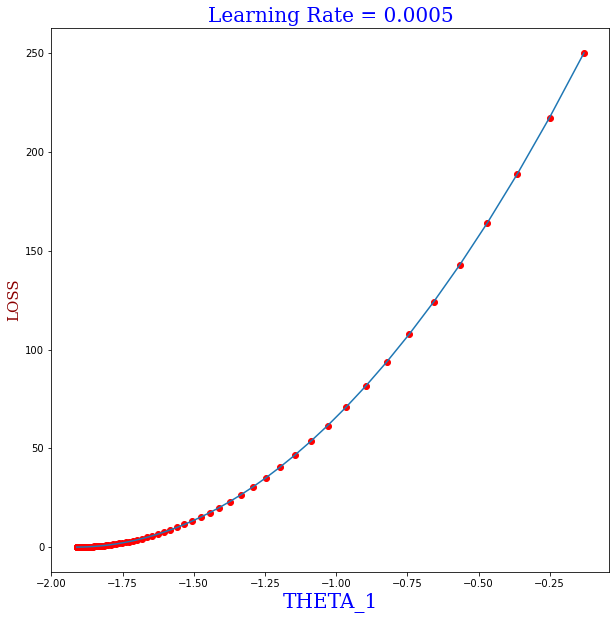

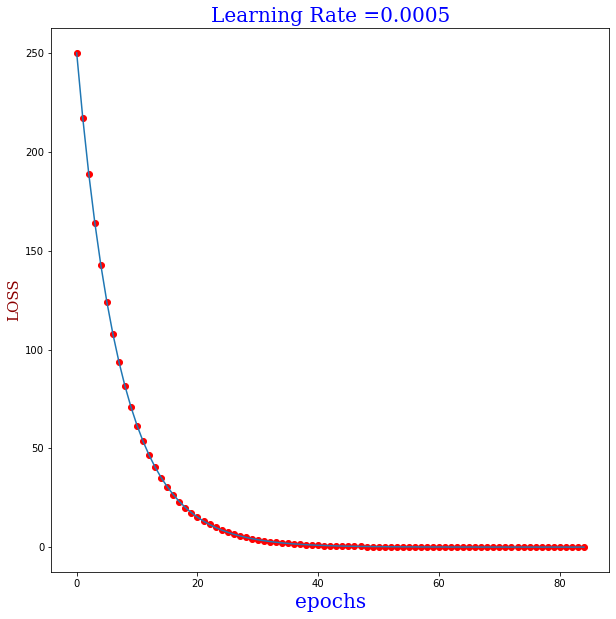

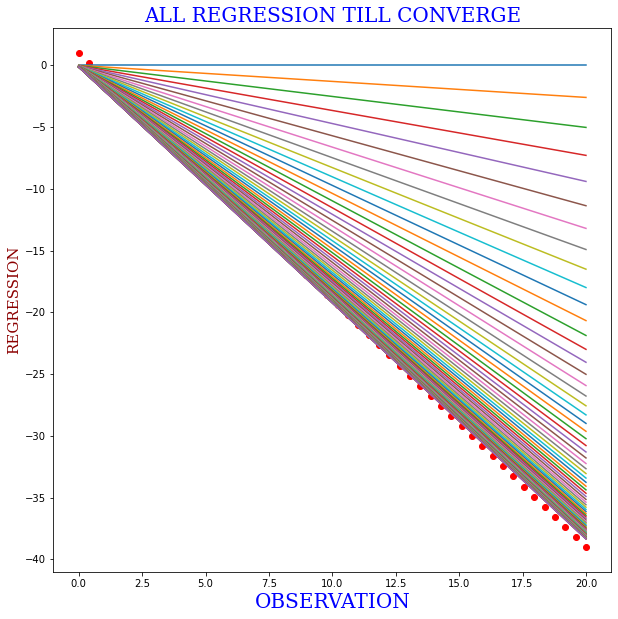

In [10]:
#for theta_0
plotting(theta0_lst,cost_lst,"THETA_0","LOSS","Learning Rate =0.0005")
#for theta_1
plotting(theta1_lst,cost_lst,"THETA_1","LOSS","Learning Rate = 0.0005")
#for epochs
epochs=np.arange(0,len(hs))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate =0.0005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.figure(figsize=(10, 10))
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)

for i in range(len(hs)):
    plt.plot(X,hs[i])
    
plt.scatter(X,y,c="r")
plt.show()   

#### Plot the best regression line

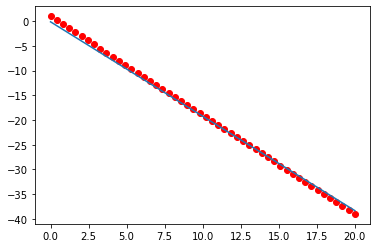

In [11]:
plt.plot(X,hs[-1])
plt.scatter(X,y,c="r")
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [12]:
theta_0,theta_1,hs,cost_lst,itert,theta0_lst,theta1_lst = GD_fun(X, y, 1000, 0.00005)


###########iteration== 0 #######################
j== 249.88775510204084
gradient_vector [ 19.        259.3877551]
gradient_vector_norm 278.38775510204084

###########iteration== 1 #######################
j== 246.51705648072965
gradient_vector [ 18.86935612 257.63135798]
gradient_vector_norm 276.5007140982924

###########iteration== 2 #######################
j== 243.19185519883976
gradient_vector [ 18.73959698 255.88685497]
gradient_vector_norm 274.626451944212

###########iteration== 3 #######################
j== 239.91153713723412
gradient_vector [ 18.61071657 254.15416553]
gradient_vector_norm 272.76488210288863

###########iteration== 4 #######################
j== 236.6754964661024
gradient_vector [ 18.48270895 252.43320967]
gradient_vector_norm 270.9159186234291

###########iteration== 5 #######################
j== 233.48313553307256
gradient_vector [ 18.35556821 250.72390793]
gradient_vector_norm 269.07947613698985

###########iteration== 6 #######################
j== 230.3338647

In [13]:
print(f'r2_score: {r2_score(y,hs[-1])}')

r2_score: 0.9976009587530529


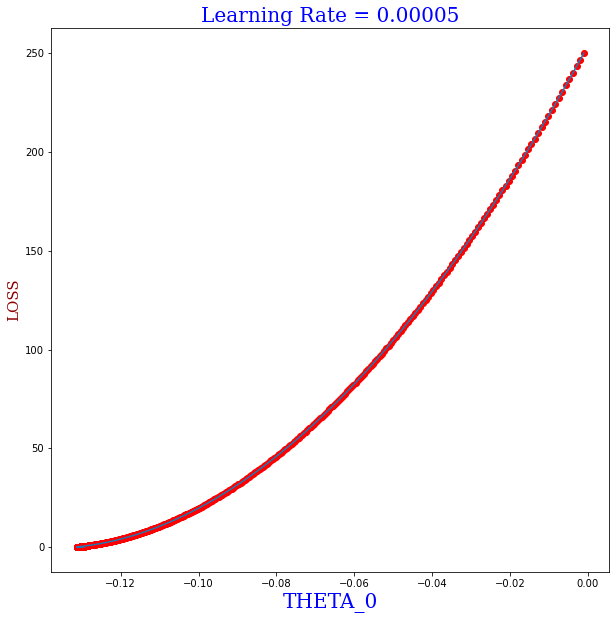

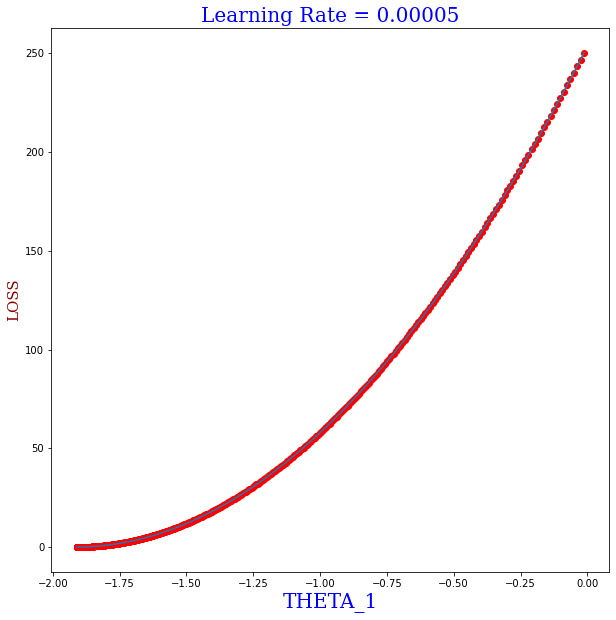

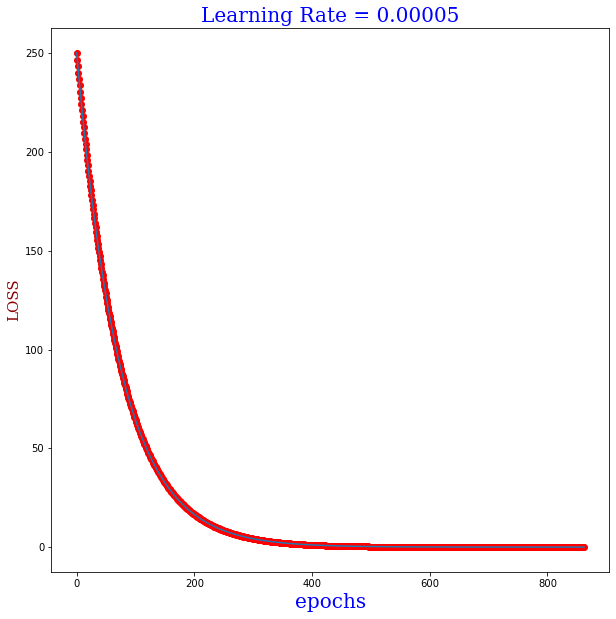

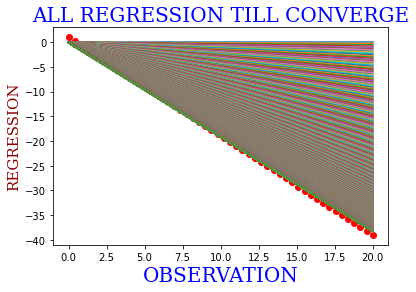

In [14]:
#for theta_0
plotting(theta0_lst,cost_lst,"THETA_0","LOSS","Learning Rate = 0.00005")
#for theta_1
plotting(theta1_lst,cost_lst,"THETA_1","LOSS","Learning Rate = 0.00005")
#for epochs
epochs=np.arange(0,len(hs))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate = 0.00005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(hs)):
    plt.plot(X,hs[i])
plt.scatter(X,y,c="r")
plt.show()   

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [15]:
theta_0,theta_1,hs,cost_lst,itert,theta0_lst,theta1_lst = GD_fun(X, y, 300,0.005)


###########iteration== 0 #######################
j== 249.88775510204084
gradient_vector [ 19.        259.3877551]
gradient_vector_norm 278.38775510204084

###########iteration== 1 #######################
j== 26.19025294403267
gradient_vector [ 5.93561224 83.74804248]
gradient_vector_norm 89.68365472719698

###########iteration== 2 #######################
j== 2.878975652984499
gradient_vector [ 1.71853206 27.04951897]
gradient_vector_norm 28.768051033370433

###########iteration== 3 #######################
j== 0.4493890625258197
gradient_vector [0.35746345 8.74656939]
gradient_vector_norm 9.104032839040988

###########iteration== 4 #######################
j== 0.1958262128637633
gradient_vector [-0.08165234  2.83814948]
gradient_vector_norm 2.9198018210376233

###########iteration== 5 #######################
j== 0.16902170833832986
gradient_vector [-0.22315155  0.93082531]
gradient_vector_norm 1.1539768544347948

###########iteration== 6 #######################
j== 0.16584803508620427
g

In [16]:
print(f'r2_score: {r2_score(y,hs[-1])}')

r2_score: 0.9976098371414047


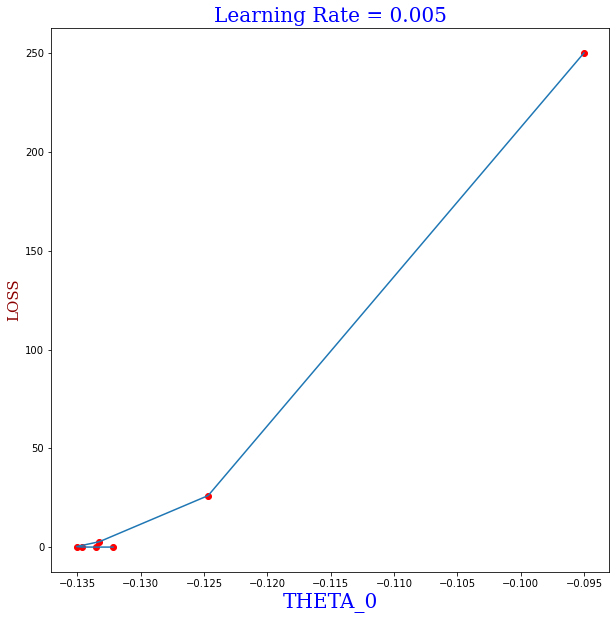

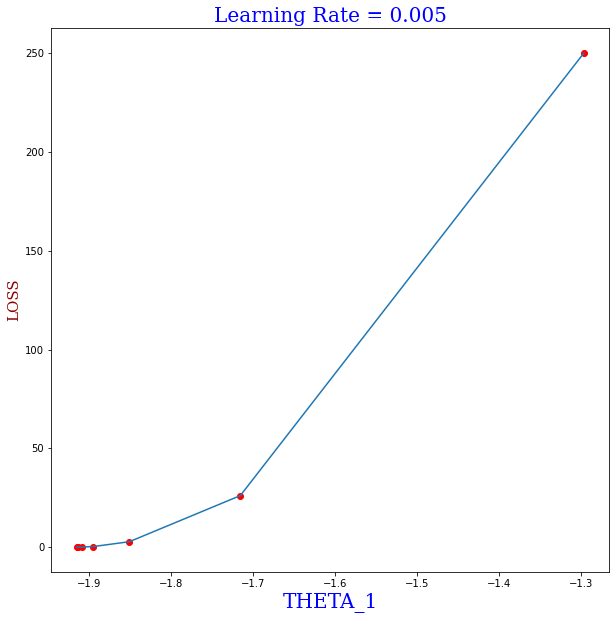

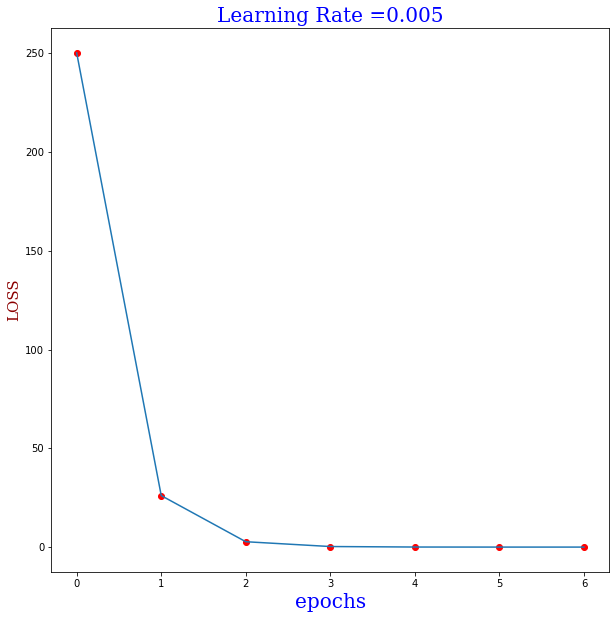

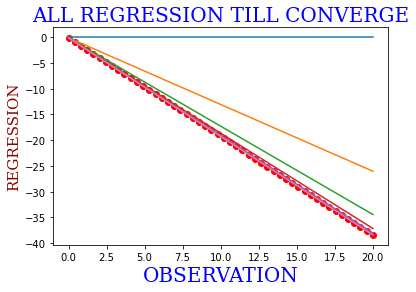

In [17]:
#for theta_0
plotting(theta0_lst,cost_lst,"THETA_0","LOSS","Learning Rate = 0.005")
#for theta_1
plotting(theta1_lst,cost_lst,"THETA_1","LOSS","Learning Rate = 0.005")
#for epochs
epochs=np.arange(0,len(hs))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate =0.005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(hs)):
    plt.plot(X,hs[i])
plt.scatter(X,hs[-1],c="r")
plt.show()   

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


### Shuffle the data

In [18]:
temp = list(zip(X, y))
random.shuffle(temp)
X, y = zip(*temp)
X, y = list(X), list(y)

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [19]:
def SGD_fun(X, y,epochs,lr) :
    theta_0 = theta_1 = 0
    e_hs = []
    
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    e_cost_lst = []
    itert=0
    temp = list(zip(X, y))
    random.shuffle(temp)
    X, y = zip(*temp)
    X, y = list(X), list(y)
    for  i in range( 1,epochs):
        hs = []
        for  x_i, y_i in zip(X, y): 
            # general function of the model of LR
    
            h_x = theta_0 + x_i*theta_1
 
            hs.append(h_x)
            # error = predicted -actual
            error = h_x - y_i
            # calculate cost function usin mean square error using dot product(make the summition of erroe**2)
            MSA = error**2 /2
            cost_lst.append(MSA)
            # THETA_NEW = THETA_OLD - LEARNING_RATE * DERIVATIVE COST_FUN W.R.T OLD THETA 
            d_theta_0 = error # dj/d theta_0 = segma(error) /m 
            d_theta_1 = error*x_i   #dj/d theta_1 = segma(error)*X /m
            # update the weights

            theta_0 = theta_0 - lr*d_theta_0
            theta_1 = theta_1 - lr*d_theta_1
            theta0_lst.append(theta_0)
            theta1_lst.append(theta_1)
    
        # get norm of gradient to check if it close to zero stop iteration 
        # why norm beacuse here we have 2 componantes theta_0 and theta _1
        gradient_vector = np.array([d_theta_0,d_theta_1])
        gradient_vector_norm = LA.norm(gradient_vector,1)

        e_hs.append(hs)
        e_cost_lst.append(MSA)
        if i<20 or i>epochs-10:
            print("\n###########iteration==",i,"#######################")
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)
        if (int(gradient_vector_norm) == 0)and (e_cost_lst[-2] -e_cost_lst[-1]<=0.01) :
            print ("#############the gradient is close to zero############")
            print("iteration == ", i )
            itert=i
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)

            break
    return (theta_0, theta_1, e_hs, e_cost_lst, itert, theta0_lst, theta1_lst, cost_lst, X,y)



In [20]:
theta_0, theta_1, e_hs, e_cost_lst, itert, theta0_lst, theta1_lst, cost_lst, X_sh, y_sh = SGD_fun(X, y,300,0.0005)



###########iteration== 1 #######################
j== 0.16573778610078388
gradient_vector [-0.57573915 -2.34995573]
gradient_vector_norm 2.9256948791087622

###########iteration== 2 #######################
j== 0.3045375956000331
gradient_vector [-0.78043269 -3.18543957]
gradient_vector_norm 3.965872265696386

###########iteration== 3 #######################
j== 0.3049735575820478
gradient_vector [-0.78099111 -3.18771882]
gradient_vector_norm 3.968709930442191

###########iteration== 4 #######################
j== 0.30116264809793786
gradient_vector [-0.77609619 -3.16773955]
gradient_vector_norm 3.9438357412278378

###########iteration== 5 #######################
j== 0.29728715934294214
gradient_vector [-0.77108645 -3.14729165]
gradient_vector_norm 3.9183781001576254

###########iteration== 6 #######################
j== 0.29345854745961375
gradient_vector [-0.76610515 -3.12695978]
gradient_vector_norm 3.893064926227107

###########iteration== 7 #######################
j== 0.2896791623984

In [21]:
print(f'r2_score: {r2_score(y_sh,e_hs[-1])}')

r2_score: 0.9998487637091876


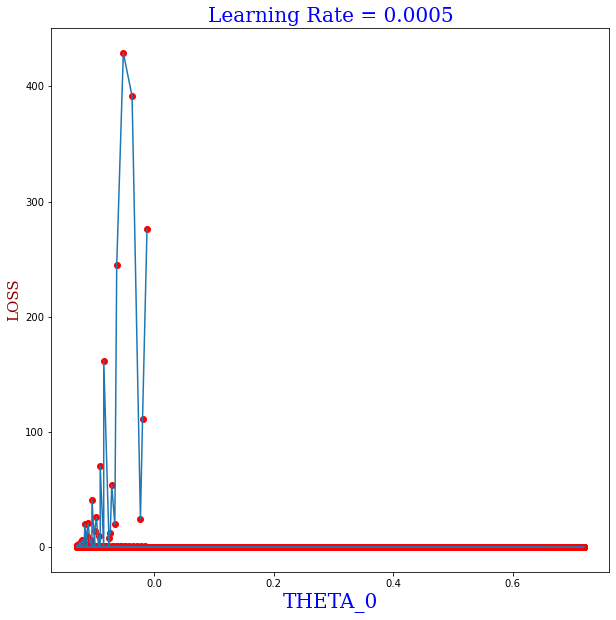

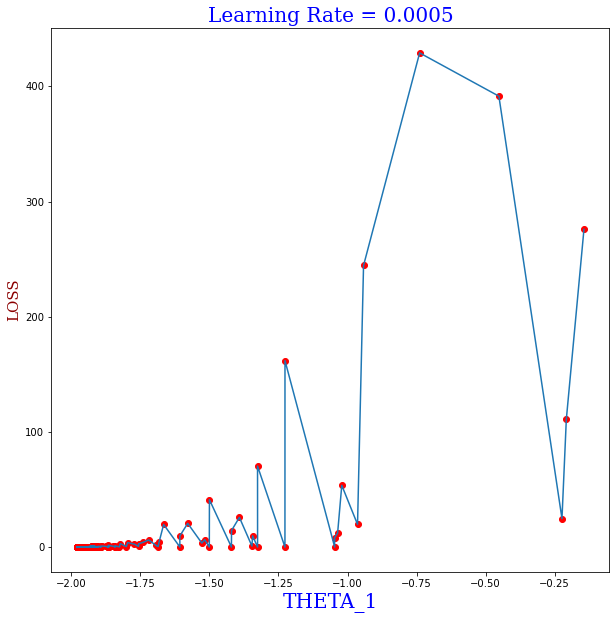

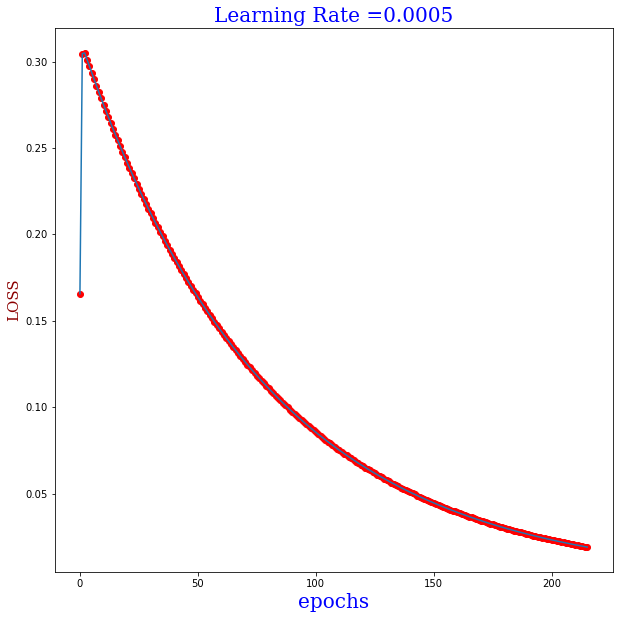

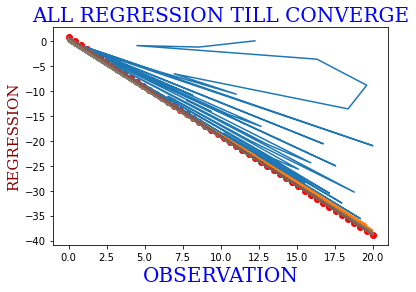

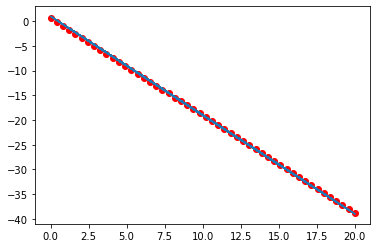

In [22]:
#for theta_0
plotting(theta0_lst,cost_lst,"THETA_0","LOSS","Learning Rate = 0.0005")
#for theta_1
plotting(theta1_lst,cost_lst,"THETA_1","LOSS","Learning Rate = 0.0005")
#for epochs
epochs=np.arange(0,len(e_cost_lst))
plotting(epochs,e_cost_lst,"epochs","LOSS","Learning Rate =0.0005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(e_hs)):
    plt.plot(X_sh,e_hs[i])
plt.scatter(X_sh,e_hs[-1],c="r")
plt.show()   
plt.scatter(X_sh,e_hs[-1],c="r")
plt.plot(X_sh,y_sh)
plt.show()   

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [23]:
theta_0, theta_1, e_hs, e_cost_lst, itert, theta0_lst, theta1_lst, cost_lst, X_sh, y_sh = SGD_fun(X, y,300,0.0001)



###########iteration== 1 #######################
j== 121.27550397888805
gradient_vector [ 15.57404918 241.55668121]
gradient_vector_norm 257.1307303904493

###########iteration== 2 #######################
j== 31.38026641228408
gradient_vector [  7.92215456 122.87423394]
gradient_vector_norm 130.79638850186043

###########iteration== 3 #######################
j== 8.271757493516503
gradient_vector [ 4.067372  63.0857698]
gradient_vector_norm 67.15314179723559

###########iteration== 4 #######################
j== 2.258674821294322
gradient_vector [ 2.12540576 32.96547709]
gradient_vector_norm 35.09088284590549

###########iteration== 5 #######################
j== 0.6578405573392581
gradient_vector [ 1.14703144 17.79069166]
gradient_vector_norm 18.937723092855

###########iteration== 6 #######################
j== 0.21390508500490785
gradient_vector [ 0.65407199 10.14479007]
gradient_vector_norm 10.798862063051239

###########iteration== 7 #######################
j== 0.08227316272022814
gr

In [24]:
print(f'r2_score: {r2_score(y_sh,e_hs[-1])}')

r2_score: 0.9988642027345627


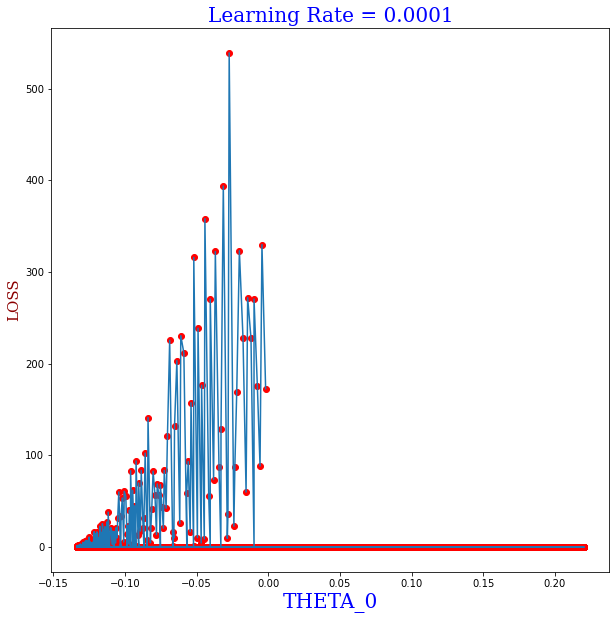

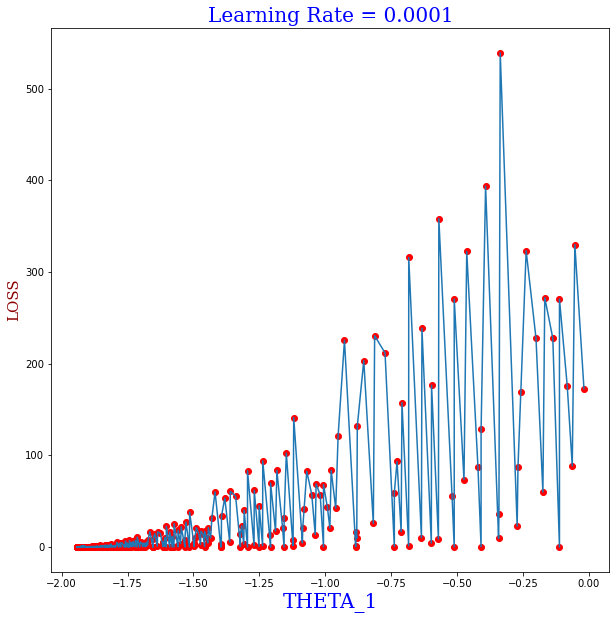

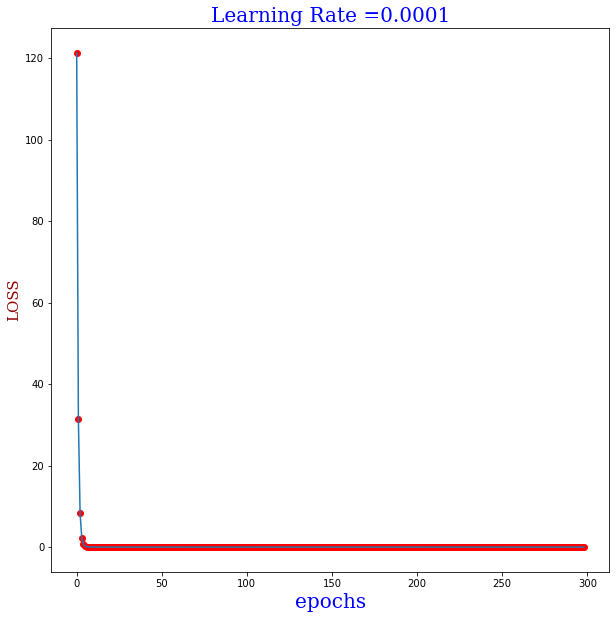

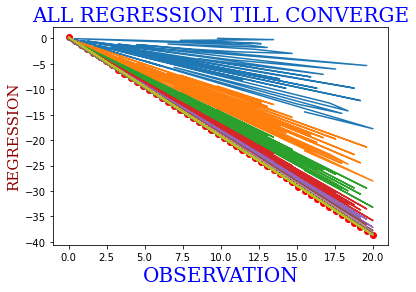

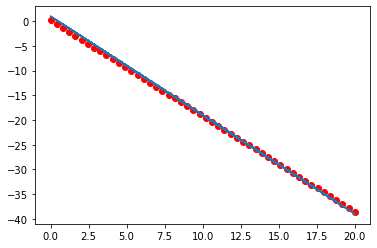

In [25]:
#for theta_0
plotting(theta0_lst,cost_lst,"THETA_0","LOSS","Learning Rate = 0.0001")
#for theta_1
plotting(theta1_lst,cost_lst,"THETA_1","LOSS","Learning Rate = 0.0001")
#for epochs
epochs=np.arange(0,len(e_cost_lst))
plotting(epochs,e_cost_lst,"epochs","LOSS","Learning Rate =0.0001")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(e_hs)):
    plt.plot(X_sh,e_hs[i])
plt.scatter(X_sh,e_hs[-1],c="r")
plt.show()   
plt.scatter(X_sh,e_hs[-1],c="r")
plt.plot(X_sh,y_sh)
plt.show()   

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [26]:
theta_0, theta_1, e_hs, e_cost_lst, itert, theta0_lst, theta1_lst, cost_lst, X_sh, y_sh = SGD_fun(X, y,300,0.00007)



###########iteration== 1 #######################
j== 123.97109072173757
gradient_vector [ 15.7461799  205.66439053]
gradient_vector_norm 221.41057043075116

###########iteration== 2 #######################
j== 47.47557539071688
gradient_vector [  9.74428811 127.27233451]
gradient_vector_norm 137.0166226157128

###########iteration== 3 #######################
j== 18.14184175341213
gradient_vector [ 6.0235939 78.6755122]
gradient_vector_norm 84.69910610377465

###########iteration== 4 #######################
j== 6.908290126295444
gradient_vector [ 3.71706608 48.54943453]
gradient_vector_norm 52.26650061226259

###########iteration== 5 #######################
j== 2.6156699069946914
gradient_vector [ 2.28721224 29.87379247]
gradient_vector_norm 32.161004710757304

###########iteration== 6 #######################
j== 0.9811603367932877
gradient_vector [ 1.40082857 18.29653638]
gradient_vector_norm 19.697364949612492

###########iteration== 7 #######################
j== 0.3624021897353816
g

In [27]:
print(f'r2_score: {r2_score(y_sh,e_hs[-1])}')

r2_score: 0.9975607133541189


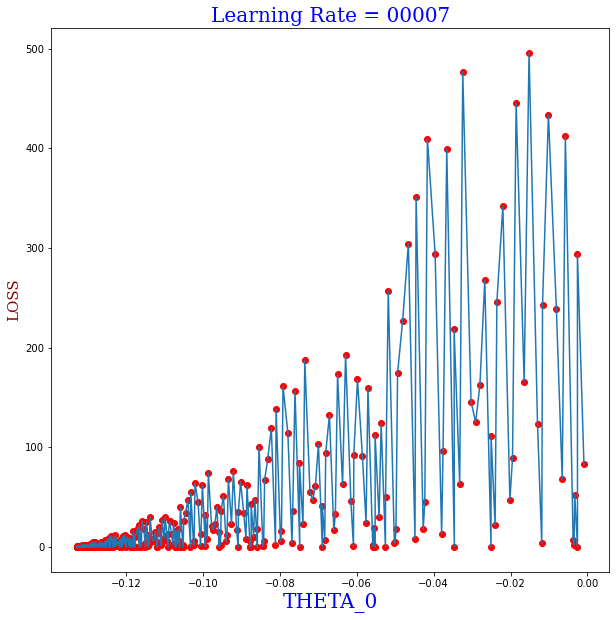

In [ ]:
#for theta_0
plotting(theta0_lst,cost_lst,"THETA_0","LOSS","Learning Rate = 00007")
#for theta_1
plotting(theta1_lst,cost_lst,"THETA_1","LOSS","Learning Rate = 00007")
#for epochs
epochs=np.arange(0,len(e_cost_lst))
plotting(epochs,e_cost_lst,"epochs","LOSS","Learning Rate = 00007")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(e_hs)):
    plt.plot(X_sh,e_hs[i])
plt.scatter(X_sh,e_hs[-1],c="r")
plt.show()   
plt.scatter(X_sh,e_hs[-1],c="r")
plt.plot(X_sh,y_sh)
plt.show()   

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [ ]:
def miniGD_fun(X, y,epochs,batch,lr) :
    theta_0 = theta_1 = 0
    e_hs = []
    theta0_lst = []
    theta1_lst = []
    e_cost_lst = []
    cost_lst = []
    m = len(X)
    itert=0
    temp = list(zip(X, y))
    random.shuffle(temp)
    X, y = zip(*temp)
    X, y = list(X), list(y)
    X = np.array(X)
    y = np.array(y)
    for  i in range( 1,epochs):
        hs = []
        for k in range(0, m, batch):
            # general function of the model of LR
    
            h_x = theta_0 + X[k:k+batch]*theta_1
 
            hs.extend(h_x)
            # error = predicted -actual
            error = h_x - y[k : k+batch]
            # calculate cost function usin mean square error using dot product(make the summition of erroe**2)
            MSA = (1 / 2 * batch) * np.linalg.norm(error, 2)**2
            cost_lst.append(MSA)
            # THETA_NEW = THETA_OLD - LEARNING_RATE * DERIVATIVE COST_FUN W.R.T OLD THETA 
            d_theta_0 = np.sum(error) / batch # dj/d theta_0 = segma(error) /m 
            d_theta_1 = np.sum(error * X[k : k+batch]) / batch   #dj/d theta_1 = segma(error)*X /m
            # update the weights

            theta_0 = theta_0 - lr*d_theta_0
            theta_1 = theta_1 - lr*d_theta_1
            theta0_lst.append(theta_0)
            theta1_lst.append(theta_1)
    
        # get norm of gradient to check if it close to zero stop iteration 
        # why norm beacuse here we have 2 componantes theta_0 and theta _1
        gradient_vector = np.array([d_theta_0,d_theta_1])
        gradient_vector_norm = LA.norm(gradient_vector,1)

        e_hs.append(hs)
        e_cost_lst.append(cost_lst[-1])
        if i<20 or i>epochs-10:
            print("\n###########iteration==",i,"#######################")
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)
        if (int(gradient_vector_norm) == 0)and (e_cost_lst[-2] -e_cost_lst[-1]<=0.01) :
            print ("#############the gradient is close to zero############")
            print("iteration == ", i )
            itert=i
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)

            break
    return (theta_0, theta_1,  e_hs, e_cost_lst,  itert,  theta0_lst, theta1_lst, cost_lst,  X,y)



##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [ ]:
theta_0, theta_1,  e_hs, e_cost_lst,  itert,  theta0_lst, theta1_lst, cost_lst,  X_sh,y_sh = miniGD_fun(X,y,300,5,0.0005)

In [ ]:
print(f'r2_score: {r2_score(y_sh,e_hs[-1])}')

In [ ]:
#for theta_0
plotting(theta0_lst,cost_lst,"THETA_0","LOSS","Learning Rate = 0.0005")
#for theta_1
plotting(theta1_lst,cost_lst,"THETA_1","LOSS","Learning Rate = 0.0005")
#for epochs
epochs=np.arange(0,len(e_cost_lst))
plotting(epochs,e_cost_lst,"epochs","LOSS","Learning Rate = 0.0005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(e_hs)):
    plt.plot(X_sh,e_hs[i])
plt.scatter(X_sh,e_hs[-1],c="r")
plt.show()   
plt.scatter(X_sh,e_hs[-1],c="r")
plt.plot(X_sh,y_sh)
plt.show()   

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [ ]:
theta_0, theta_1,  e_hs, e_cost_lst,  itert,  theta0_lst, theta1_lst, cost_lst,  X_sh,y_sh = miniGD_fun(X,y,300,10,0.0005)

In [ ]:
print(f'r2_score: {r2_score(y_sh,e_hs[-1])}')

In [ ]:
#for theta_0
plotting(theta0_lst,cost_lst,"THETA_0","LOSS","Learning Rate = 0.0005")
#for theta_1
plotting(theta1_lst,cost_lst,"THETA_1","LOSS","Learning Rate = 0.0005")
#for epochs
epochs=np.arange(0,len(e_cost_lst))
plotting(epochs,e_cost_lst,"epochs","LOSS","Learning Rate = 0.0005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(e_hs)):
    plt.plot(X_sh,e_hs[i])
plt.scatter(X_sh,e_hs[-1],c="r")
plt.show()   
plt.scatter(X_sh,e_hs[-1],c="r")
plt.plot(X_sh,y_sh)
plt.show()   

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [ ]:
theta_0, theta_1,  e_hs, e_cost_lst,  itert,  theta0_lst, theta1_lst, cost_lst,  X_sh,y_sh = miniGD_fun(X,y,300,20,0.0005)

In [ ]:
print(f'r2_score: {r2_score(y_sh,e_hs[-1])}')

In [ ]:
#for theta_0
plotting(theta0_lst,cost_lst,"THETA_0","LOSS","Learning Rate = 0.0005")
#for theta_1
plotting(theta1_lst,cost_lst,"THETA_1","LOSS","Learning Rate = 0.0005")
#for epochs
epochs=np.arange(0,len(e_cost_lst))
plotting(epochs,e_cost_lst,"epochs","LOSS","Learning Rate = 0.0005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(e_hs)):
    plt.plot(X_sh,e_hs[i])
plt.scatter(X_sh,e_hs[-1],c="r")
plt.show()   
plt.scatter(X_sh,e_hs[-1],c="r")
plt.plot(X_sh,y_sh)
plt.show()   